In [133]:
from jmetal.algorithm.multiobjective import NSGAII
from jmetal.operator.crossover import SBXCrossover
from jmetal.operator.mutation import PolynomialMutation
from jmetal.problem import Fonseca
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.util.solution import get_non_dominated_solutions, print_function_values_to_file
import time

problem = Fonseca()

algorithm = NSGAII(
    problem=problem,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables(), distribution_index=20),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations=10000)
)

algorithm.start_computing_time = time.time()
algorithm.solutions = algorithm.create_initial_solutions()
algorithm.solutions = algorithm.evaluate(algorithm.solutions)
algorithm.init_progress()

i = 0
while not algorithm.stopping_condition_is_met():
    i += 1
    print('Iteration: ' + str(i))
    algorithm.step()
    algorithm.update_progress()
    if (i == 1 or i == 5 or i == 10 or i == 50):
        result = algorithm.result()
        front = get_non_dominated_solutions(algorithm.result())
        print_function_values_to_file(front, f'results/FUN.NSGAII.Fonseca.{i}')


algorithm.total_computing_time = time.time() - algorithm.start_computing_time

[2025-10-01 16:01:55,569] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.1


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


[2025-10-01 16:01:55,821] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.5


Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


[2025-10-01 16:01:56,159] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.10


Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50


[2025-10-01 16:01:58,375] [jmetal.util.solution] [INFO] Output file (function values): results/FUN.NSGAII.Fonseca.50


Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99


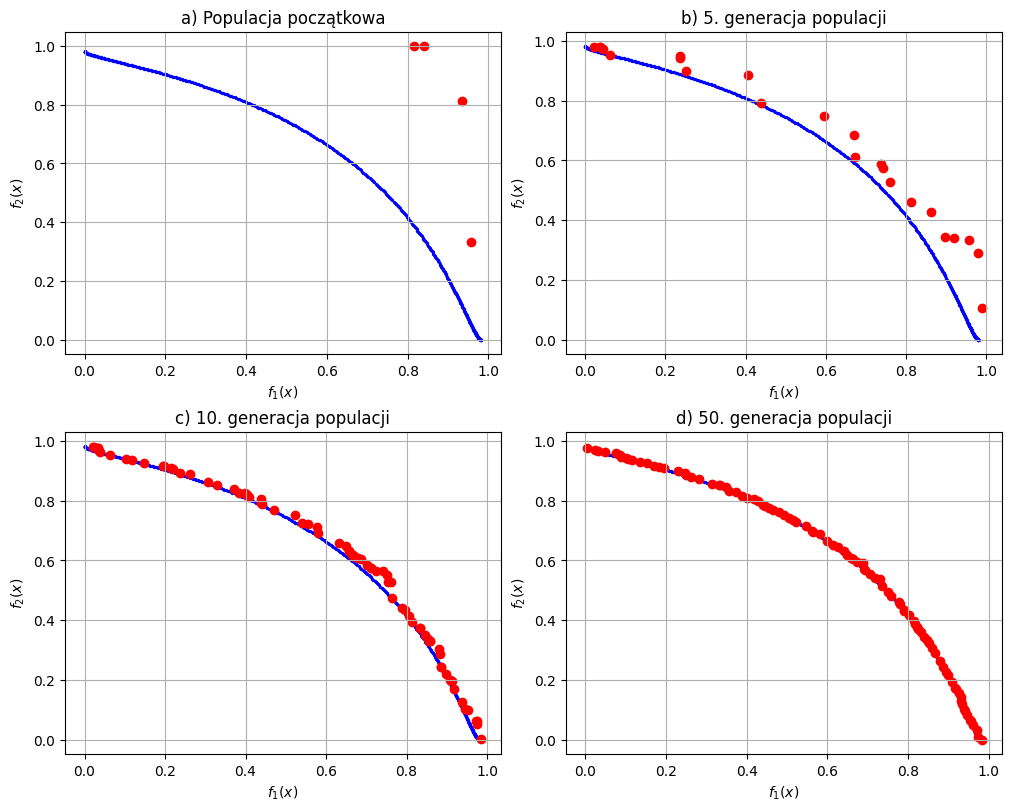

In [134]:
import numpy as np
import matplotlib.pyplot as plt

fun1 = np.loadtxt("results/FUN.NSGAII.Fonseca.1")
fun1_x = fun1[:, 0]
fun1_y = fun1[:, 1]

fun5 = np.loadtxt("results/FUN.NSGAII.Fonseca.5")
fun5_x = fun5[:, 0]
fun5_y = fun5[:, 1]

fun10 = np.loadtxt("results/FUN.NSGAII.Fonseca.10")
fun10_x = fun10[:, 0]
fun10_y = fun10[:, 1]

fun50 = np.loadtxt("results/FUN.NSGAII.Fonseca.50")
fun50_x = fun50[:, 0]
fun50_y = fun50[:, 1]

ref = np.loadtxt("reference_fronts/Fonseca.pf")
ref = ref[ref[:, 0].argsort()]
ref_x = ref[:, 0]
ref_y = ref[:, 1]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), constrained_layout=True)
# fig.suptitle("Pareto front approximation (NSGAII-Fonseca)", fontsize="x-large")
plt.subplot(221) # (rows-columns-index)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=2)
plt.scatter(fun1_x, fun1_y, marker="o", facecolors='red')
plt.title('a) Populacja początkowa')

plt.subplot(222)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=2)
plt.scatter(fun5_x, fun5_y, marker="o", facecolors='red')
plt.title('b) 5. generacja populacji')

plt.subplot(223)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=2)
plt.scatter(fun10_x, fun10_y, marker="o", facecolors='red')
plt.title('c) 10. generacja populacji')

plt.subplot(224)
plt.xlabel("$f_1{(x)}$")
plt.ylabel("$f_2{(x)}$")
plt.grid(True)
plt.scatter(ref_x, ref_y, marker="o", facecolors='blue', s=2)
plt.scatter(fun50_x, fun50_y, marker="o", facecolors='red')
plt.title('d) 50. generacja populacji')
plt.show()